## Getting to know data:
It is important to know the data before processing it. Here is the all column names available in the dataset. I will try in the following cells to extract useful information as much as I can.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

df = pd.read_csv('../input/indian-food-101/indian_food.csv')
print(list(df.columns))

['name', 'ingredients', 'diet', 'prep_time', 'cook_time', 'flavor_profile', 'course', 'state', 'region']


Here I have made a stacked bar chart of number of dishes and from a state.
Stacking different *course* type of dishes helps to understand the dataset in more detail.

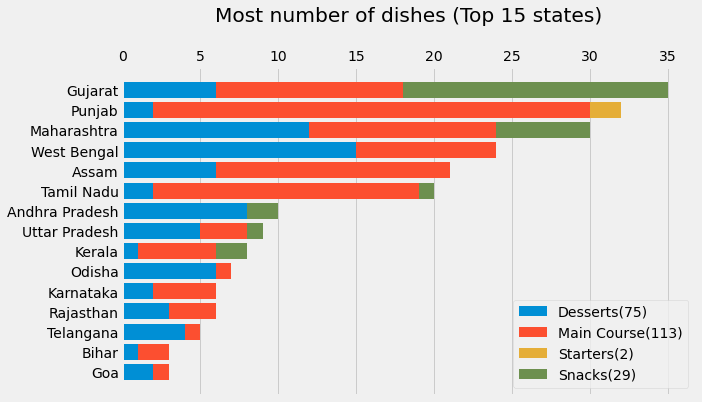

In [33]:
def states_in_stacked_bar():
    dt = df[['course', 'state']]
    fr = pd.DataFrame()
    for st in dt.state.unique():
        st_df = dt[dt.state == st]
        for cr in dt.course.unique():
            fr.loc[st,cr] = len(st_df[st_df['course'] == cr])
    fr['total'] = fr.sum(axis=1)
    fr.sort_values('total', ascending=False, inplace=True)
    fr.drop('-1', inplace=True)
    fr = fr.iloc[:15,:]
    #print(fr)
    ax, fig = plt.subplots(figsize=(10,6))
    plt.barh(fr.index, fr.dessert, label='Desserts({})'.format(int(fr.dessert.sum())))
    plt.barh(fr.index, fr['main course'], left=fr.dessert, label='Main Course({})'.format(int(fr['main course'].sum())))
    plt.barh(fr.index, fr.starter, left=fr.dessert+fr['main course'], label='Starters({})'.format(int(fr['starter'].sum())))
    plt.barh(fr.index, fr.snack, left=fr.dessert+fr['main course']+fr.starter, label='Snacks({})'.format(int(fr['snack'].sum())))
    plt.title('Most number of dishes (Top 15 states)\n')
    plt.grid(b=None, axis='y')
    plt.gca().invert_yaxis()
    plt.gca().xaxis.tick_top()
    plt.subplots_adjust(left=0.174, bottom=0.015, right=0.97, top=0.774, wspace=0.2, hspace=0.2)
    plt.legend()
    plt.show()

states_in_stacked_bar()

## Relation of average preparation time, cook time with course:
From the bar chart shown below, it is evident that on an average starter takes highest time to prepare.
Dessert takes more time to cook than to prepare on the contrary, average snack takes longer to prepare than to cook.
On an average main course is quickest to prepare.


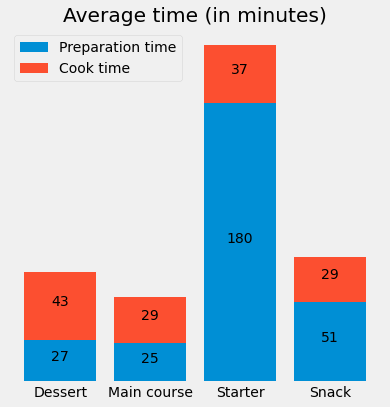

In [27]:
def course_time_bar():
    fr = df[['prep_time', 'cook_time', 'course']]
    fr = fr.replace(to_replace='-1', value=pd.NaT)
    fr.dropna(inplace=True)
    dsrt = fr[fr['course'] == 'dessert']
    mncr = fr[fr['course'] == 'main course']
    strt = fr[fr['course'] == 'starter']
    snck = fr[fr['course'] == 'snack']

    ptime, ctime = [], []
    for series in [dsrt, mncr, strt, snck]:
        ptime.append(series.prep_time.sum()/len(series))
        ctime.append((series.cook_time.sum())/len(series))
    #print(dsrt, mncr, strt, snck)
   
    fig, axes = plt.subplots(figsize=(6,6))
    ax1 = plt.subplot2grid((1,1),(0,0), rowspan=1, colspan=1)
    plt.title('Average time (in minutes)')

    ax1.bar(['Dessert', 'Main course', 'Starter', 'Snack'], ptime, label='Preparation time')
    ax1.bar(['Dessert', 'Main course', 'Starter', 'Snack'], ctime, bottom=ptime, label='Cook time')
    for p in ax1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax1.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center')
    ax1.set(yticklabels=[])
    plt.subplots_adjust(left=0.08, bottom=0.1, right=0.95, top=0.92, wspace=0.2, hspace=0.1)
    plt.grid(False)
    plt.legend()
    plt.show()

course_time_bar()

## Regional breakdown:
Following pie charts shows:
* Northern region has least sweet dishes.
* Western region is leading in both sweet and spicy dishes. (This might be because of data has more dishes from western states.)
* East Indians eat very few spicy dishes.
* Most vegetarian dishes are from west and Non-vegetarian dishes are from north.
* Southern region has more or less even distribution of all four kinds of dishes.

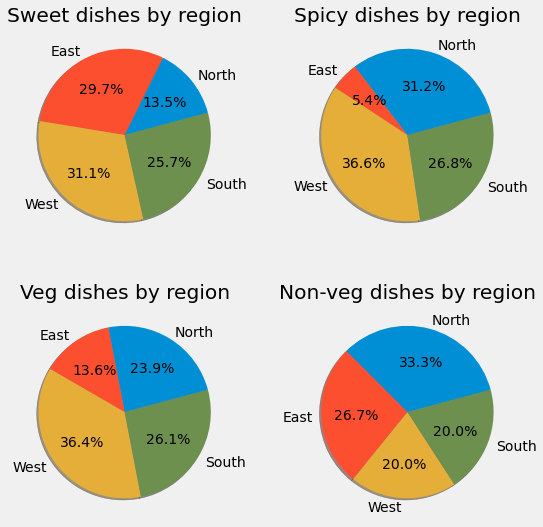

In [37]:
def region_pie():
    fr = df[['diet', 'flavor_profile', 'region']]
    fr = fr.replace(to_replace='-1', value=pd.NaT)
    fr.dropna(inplace=True)
    
    sweet = fr[fr['flavor_profile'] == 'sweet']
    spicy = fr[fr['flavor_profile'] == 'spicy']
    vdiet = fr[fr['diet'] == 'vegetarian']
    ndiet = fr[fr['diet'] == 'non vegetarian']

    regions = ['North', 'East', 'West', 'South']
    sprofile, cprofile, veg, nveg = [], [], [], []

    for rgn in regions:
        sprofile.append(len(sweet[sweet['region'] == rgn]))
        cprofile.append(len(spicy[spicy['region'] == rgn]))
        veg.append(len(vdiet[vdiet['region'] == rgn]))
        nveg.append(len(ndiet[ndiet['region'] == rgn]))

    fig, axes = plt.subplots(figsize=(8,8))
    ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
    plt.title('Sweet dishes by region')
    ax2 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
    plt.title('Spicy dishes by region')
    ax3 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
    plt.title('Veg dishes by region')
    ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)
    plt.title('Non-veg dishes by region')

    ax1.pie(sprofile, labels=regions, autopct='%1.1f%%', startangle=15, shadow = True)
    ax2.pie(cprofile, labels=regions, autopct='%1.1f%%', startangle=15, shadow = True)
    ax3.pie(veg, labels=regions, autopct='%1.1f%%', startangle=15, shadow = True)
    ax4.pie(nveg, labels=regions, autopct='%1.1f%%', startangle=15, shadow = True)

    plt.subplots_adjust(left=0.08, bottom=0, right=0.945, top=0.962, wspace=0.312, hspace=0.0)
    plt.show()

region_pie()

## Ingredients wordcloud:
Most used ingredients in Indina dishes are 'sugar, milk, garam masala, rice, urad dal, ginger, coconut'.

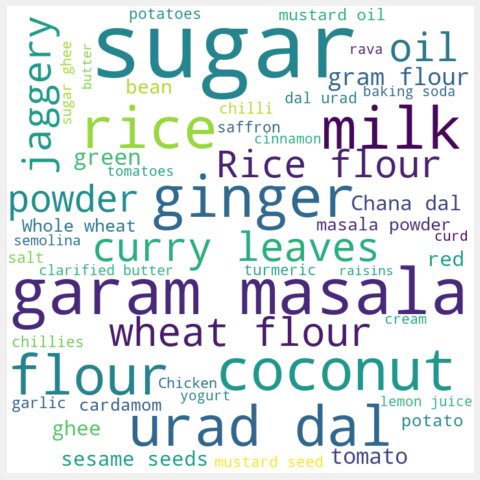

In [29]:
def ingredients_cloud():
    #ingr_hist = {}
    all_ingrs = ''

    for row in df['ingredients'].iteritems():
        ingrs = row[1].split(',')
        for ingr in ingrs:
            all_ingrs = all_ingrs + ' ' + ingr

    wordcloud = WordCloud(width=720, height=720, max_words=50, background_color='white').generate(all_ingrs)
    plt.figure(figsize=(8,8)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    plt.show()

ingredients_cloud()

## Quickest dishes:
I have sorted out the dishes on the basis of total making time. Stacked bar chart shows the 15 quickest dishes (5 from each course except snack) to make.

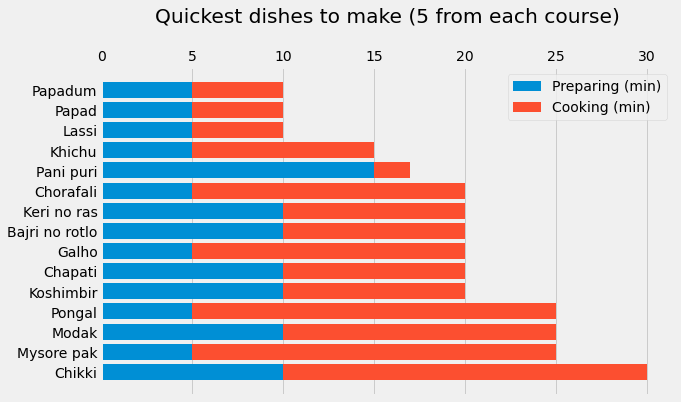

In [30]:
def fastest_dish():
    fr = df[['name', 'prep_time', 'cook_time', 'course']]
    fr = fr.replace(to_replace=-1, value=pd.NaT)
    fr.dropna(inplace=True)
    fr['total'] = fr.sum(1)
    fr.sort_values('total', ascending=True, inplace=True)
    top5snack = fr[fr['course'] == 'snack'][:5]
    top5dessert = fr[fr['course'] == 'dessert'][:5]
    top5main = fr[fr['course'] == 'main course'][:5]

    fast_dish = top5snack.append(top5dessert)
    fast_dish = fast_dish.append(top5main)
    fast_dish.sort_values('total', inplace=True)
    # print(fast_dish)

    fig, axes = plt.subplots(figsize=(10,6))
    plt.barh(fast_dish.name, fast_dish.prep_time, label='Preparing (min)')
    plt.barh(fast_dish.name, fast_dish.cook_time, left=fast_dish.prep_time, label='Cooking (min)')
    plt.grid(b=None, axis='y')
    plt.gca().invert_yaxis()
    plt.gca().xaxis.tick_top()
    plt.subplots_adjust(left=0.174, bottom=0.015, right=0.97, top=0.774, wspace=0.2, hspace=0.2)
    plt.title('Quickest dishes to make (5 from each course)\n')
    plt.legend()
    plt.show()

fastest_dish()

## Dishes with similar ingredients:
I processed the data and filtered out the dishes that has highest common ingredients. It is fasinating to see dishes (i.e., Kheer-Doodhpak, Sandesh-Shrikhand, Pattor-Patra) from distant states has almost same ingredients but different name.

In [31]:
def common_dishes():
    fr = df[['name', 'ingredients']]
    similar, dish_1, dish_2, common_ingredients = [], [], [], []
    x = 0.7

    for dish1 in fr.itertuples():
        ingr1 = []
        ingr1 = dish1[2].split(', ')
        for dish2 in fr.itertuples():
            ingr2, common_ingr = [], []
            if dish1[1] == dish2[1]:
                #print('skipped {}'.format(dish2[1]))
                continue
            else:
                ingr2 = dish2[2].split(', ')
                if len(ingr1) > len(ingr2):
                    for i in ingr1:
                        if i in ingr2:
                            common_ingr.append(i)
                    if len(common_ingr) > 0:
                        if (len(common_ingr)/len(ingr1)) > x and (len(common_ingr)/len(ingr2)) > x:
                            if ([dish1[1], dish2[1]] and [dish2[1], dish1[1]]) not in similar:
                                similar.append([dish1[1], dish2[1]])
                                dish_1.append(dish1[1])
                                dish_2.append(dish2[1])
                                common_ingredients.append(common_ingr)
                                #print('{}--{}--> COMMON INGREDIENTS: {}'.format(dish1[1], dish2[1], common_ingr))
                                #print('common ingr: {}, total: {},{}'.format(len(common_ingr), len(ingr1), len(ingr2)))
                else:
                    for i in ingr2:
                        if i in ingr1:
                            common_ingr.append(i)
                    if len(common_ingr) > 0:
                        if (len(common_ingr)/len(ingr2)) > x and (len(common_ingr)/len(ingr1)) > x:
                            if ([dish1[1], dish2[1]] and [dish2[1], dish1[1]]) not in similar:
                                similar.append([dish1[1], dish2[1]])
                                dish_1.append(dish1[1])
                                dish_2.append(dish2[1])
                                common_ingredients.append(common_ingr)
                                #print('{}--{}--> COMMON INGREDIENTS: {}'.format(dish1[1], dish2[1], common_ingr))
                                #print('common ingr: {}, total: {},{}'.format(len(common_ingr), len(ingr2), len(ingr1)))
    
    same_dishes = pd.DataFrame(data={'dish_1': dish_1, 'dish_2': dish_2,
                                     'common_ingredients': common_ingredients})
    print(same_dishes)
    #print(similar)

common_dishes()

          dish_1     dish_2                                 common_ingredients
0         Boondi      Laddu                          [Gram flour, ghee, sugar]
1          Kheer   Doodhpak                                [Milk, rice, sugar]
2  Chhena jalebi   Ledikeni                              [Chhena, sugar, ghee]
3  Chhena jalebi     Pantua                              [Chhena, sugar, ghee]
4       Ledikeni     Pantua                              [Chhena, sugar, ghee]
5        Sandesh  Shrikhand                         [sugar, saffron, cardamom]
6     Unni Appam  Kajjikaya                     [Rice flour, jaggery, coconut]
7         Pattor      Patra  [Arbi ke patte, sesame seeds, gur, bengal gram...
